# Clicked Machine Learning Classification Model 

## The folllowing is the model for the dataset on clicked adverts and the prediction by using CatBoostClassifier. The train.csv dataset contains 1000 entries and the test.csv dataset contains 300 entries to which the prediction is outputed into the Clicked_result.csv. You can follow through to see the operations performed on the data and the model built for the prediction.

## The first cell contains all the neccesary libraries that will be used in the model and all the preprocessing activities.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, StratifiedKFold
import sklearn.metrics as metrics
from catboost import CatBoostClassifier,CatBoostRegressor
from xgboost import XGBClassifier

## Getting the datasets


In [2]:
train = pd.read_csv(r'C:\Users\Admin\Downloads\train.csv')
test = pd.read_csv(r'C:\Users\Admin\Downloads\test.csv')
sub = pd.read_csv(r'C:\Users\Admin\Downloads\test_solution.csv')

## Viewing the the train.csv dataset

In [3]:
train

,id,Timestamp,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,gender,Country,Clicked
0,1200,01-01-16 3:35,68.01,25,14775.50,188.32,Adaptive 24hour Graphic Interface,1,Afghanistan,0
1,1201,27-02-16 15:04,45.99,33,57009.76,124.61,Adaptive 24hour Graphic Interface,1,Afghanistan,1
2,1202,01-03-16 10:01,77.07,40,57877.15,261.02,Adaptive asynchronous attitude,0,Afghanistan,0
3,1203,10-03-16 22:28,51.87,50,60575.99,119.65,Adaptive context-sensitive application,0,Afghanistan,1
4,1204,12-03-16 1:39,66.83,32,61004.51,201.26,Adaptive contextually-based methodology,1,Afghanistan,1
...,...,...,...,...,...,...,...,...,...,...
995,2195,24-02-16 0:44,83.98,36,55764.43,194.62,Vision-oriented real-time framework,0,Zimbabwe,0
996,2196,24-02-16 7:13,36.91,48,56067.38,159.69,Vision-oriented system-worthy forecast,0,Zimbabwe,1
997,2197,27-02-16 8:52,56.64,29,56770.79,123.24,Vision-oriented system-worthy forecast,1,Zimbabwe,1
998,2198,28-04-16 21:58,67.35,29,76368.31,118.69,Vision-oriented uniform knowledgebase,0,Zimbabwe,1



## Viewing the the test.csv dataset 


In [4]:
test

,id,Timestamp,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,gender,Country
0,2200,04-06-16 17:24,43.88,54,31523.09,166.85,Enhanced methodical database,1,Somalia
1,2201,05-06-16 0:29,66.40,40,77567.85,214.42,Digitized heuristic solution,0,Antigua and Barbuda
2,2202,05-06-16 0:29,79.52,34,NaN,141.58,Customer-focused 24/7 concept,0,United States of America
3,2203,05-06-16 7:54,52.35,25,33293.78,147.61,Mandatory 4thgeneration structure,1,Mali
4,2204,05-06-16 7:54,81.51,36,NaN,195.93,Monitored local Internet solution,0,Croatia
...,...,...,...,...,...,...,...,...,...
295,2495,23-07-16 6:18,74.06,23,40345.49,225.99,Phased content-based middleware,0,Wallis and Futuna
296,2496,23-07-16 11:46,61.88,42,60223.52,112.19,Balanced actuating moderator,1,Martinique
297,2497,23-07-16 14:47,80.03,44,24030.06,150.84,Automated static concept,0,Afghanistan
298,2498,24-07-16 0:22,86.38,33,NaN,233.60,Organic well-modulated database,0,United States of America


## Visualizing the distribution of Clicked values in the train.csv dataset

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


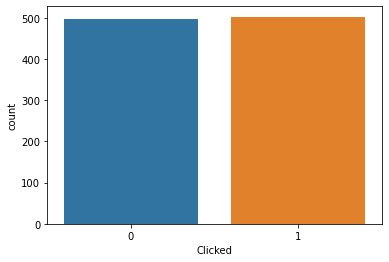

In [5]:
sns.countplot(train['Clicked']);

## Finding out how many unique values are in each column in the train.csv dataset.

In [6]:
train.nunique().sort_values()

gender                         2
Clicked                        2
Age                           43
Country                      233
Daily Time Spent on Site     751
Timestamp                    772
Area Income                  775
Daily Internet Usage         797
Ad Topic Line                825
id                          1000
dtype: int64

## Finding out the data types of the columns in the train.csv dataset for identification of Categorical data. The categorical data is identified by the datatype "object".

In [7]:
train.dtypes

id                            int64
Timestamp                    object
Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
gender                        int64
Country                      object
Clicked                       int64
dtype: object

## Finding the null values in the train.csv dataset

In [8]:
train.isnull().sum()

id                            0
Timestamp                     0
Daily Time Spent on Site      0
Age                           0
Area Income                 225
Daily Internet Usage          0
Ad Topic Line                 0
gender                        0
Country                       0
Clicked                       0
dtype: int64

## finding the null values in the test.csv dataset

In [9]:
test.isnull().sum()

id                           0
Timestamp                    0
Daily Time Spent on Site     0
Age                          0
Area Income                 75
Daily Internet Usage         0
Ad Topic Line                0
gender                       0
Country                      0
dtype: int64

## Inputting missing values for both train.csv and test.csv datasets

In [10]:
train.fillna(-999, inplace=True)
test.fillna(-999,inplace=True)

## Checking if the missing values are filled in in train.csv

In [11]:
train.isnull().sum()

id                          0
Timestamp                   0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
gender                      0
Country                     0
Clicked                     0
dtype: int64

## Checking if the missing values are filled in in train.csv

In [12]:
test.isnull().sum()

id                          0
Timestamp                   0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
gender                      0
Country                     0
dtype: int64

## First,we separate the train.csv dataset by getting a separate collection of the intended output for training the model. Dividing the train dataset to train the model. I also dropped some irrelevant data like 'Clicked' which is being generated and 'id' which is equivalent to a name, that doesn't repeat in the entire dataset, so it would not help in the model. I had added Timestamp to this list but I decided to use it . In the repository you can still find the prediction result that I got without using Timestamp, clicked_results.csv.

In [13]:
X = train.drop(['Clicked',"id"], axis=1)
Y = train.Clicked

## Dividing the train.csv dataset to train the model. You create a training dataset and a testing dataset from the train.csv dataset. The 0.20 signifies the division. So 80% for training and 20% for testing.

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=1234)

## Here, we are verifying the datatypes to ensure you get all the categorical data types. No preprocessing activities will be done on the categorical data, CatBoostClassifier will handle all of that to change the categorical data to numerical data to be used by the classification algorithm. 
## Categorical data in simple terms refers to data that refers to specific categories signified by words thus they can be converted to numeric data. words like "yes","no" and "maybe" are converted to 1, 2 and 3 instead. Machine Learning algorithms use mathematical calculations to calculate the predicitions behind the scenes so they need numbers to work, herego the "yes", "no" and "maybe" data is changed to numbers to be able to be used in the mathematical equation.

In [15]:
X.dtypes

Timestamp                    object
Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
gender                        int64
Country                      object
dtype: object

## This is the part where you identify all the categorical columns for CatBoost to do its thing.

In [16]:
cat_features = ["Timestamp","Ad Topic Line", "Country"]

## This is the part where the model is finally actualized in full. you need to tweek the values insided the model to make changes to the accuracy and other factors of the model.

In [17]:
model_cb = CatBoostClassifier(task_type = 'CPU', iterations = 1000, random_state = 2021, eval_metric='Accuracy', learning_rate = 0.3)

## This is the part where you fit the data you have been preparing to the model for training.

In [18]:
model_cb.fit(X_train, Y_train, cat_features = cat_features, plot = True, eval_set = (X_test, Y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8475000	test: 0.8800000	best: 0.8800000 (0)	total: 185ms	remaining: 3m 5s
1:	learn: 0.8462500	test: 0.8850000	best: 0.8850000 (1)	total: 207ms	remaining: 1m 43s
2:	learn: 0.8525000	test: 0.8950000	best: 0.8950000 (2)	total: 235ms	remaining: 1m 18s
3:	learn: 0.8625000	test: 0.8800000	best: 0.8950000 (2)	total: 257ms	remaining: 1m 4s
4:	learn: 0.8625000	test: 0.8700000	best: 0.8950000 (2)	total: 277ms	remaining: 55.2s
5:	learn: 0.8725000	test: 0.8900000	best: 0.8950000 (2)	total: 295ms	remaining: 48.9s
6:	learn: 0.8750000	test: 0.8850000	best: 0.8950000 (2)	total: 315ms	remaining: 44.7s
7:	learn: 0.8725000	test: 0.8750000	best: 0.8950000 (2)	total: 336ms	remaining: 41.6s
8:	learn: 0.8737500	test: 0.8700000	best: 0.8950000 (2)	total: 346ms	remaining: 38.1s
9:	learn: 0.8887500	test: 0.8750000	best: 0.8950000 (2)	total: 367ms	remaining: 36.4s
10:	learn: 0.8912500	test: 0.8900000	best: 0.8950000 (2)	total: 396ms	remaining: 35.6s
11:	learn: 0.8925000	test: 0.8850000	best: 0.895000

98:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 2.81s	remaining: 25.6s
99:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 2.84s	remaining: 25.5s
100:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 2.86s	remaining: 25.5s
101:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 2.88s	remaining: 25.4s
102:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 2.91s	remaining: 25.3s
103:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 2.94s	remaining: 25.3s
104:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 2.97s	remaining: 25.3s
105:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 2.99s	remaining: 25.2s
106:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 3.02s	remaining: 25.2s
107:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 3.06s	remaining: 25.2s
108:	learn: 1.0000000	test: 0.8600000	best: 0.8950000 (2)	total: 3.09s	remaining: 25.2s
109:	learn: 1.0000000	test: 0.8650

198:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 5.2s	remaining: 20.9s
199:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 5.22s	remaining: 20.9s
200:	learn: 1.0000000	test: 0.8600000	best: 0.8950000 (2)	total: 5.25s	remaining: 20.9s
201:	learn: 1.0000000	test: 0.8600000	best: 0.8950000 (2)	total: 5.29s	remaining: 20.9s
202:	learn: 1.0000000	test: 0.8600000	best: 0.8950000 (2)	total: 5.31s	remaining: 20.9s
203:	learn: 1.0000000	test: 0.8600000	best: 0.8950000 (2)	total: 5.34s	remaining: 20.8s
204:	learn: 1.0000000	test: 0.8600000	best: 0.8950000 (2)	total: 5.36s	remaining: 20.8s
205:	learn: 1.0000000	test: 0.8600000	best: 0.8950000 (2)	total: 5.39s	remaining: 20.8s
206:	learn: 1.0000000	test: 0.8600000	best: 0.8950000 (2)	total: 5.42s	remaining: 20.7s
207:	learn: 1.0000000	test: 0.8600000	best: 0.8950000 (2)	total: 5.43s	remaining: 20.7s
208:	learn: 1.0000000	test: 0.8600000	best: 0.8950000 (2)	total: 5.46s	remaining: 20.6s
209:	learn: 1.0000000	test: 0.860

292:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 7.52s	remaining: 18.1s
293:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 7.54s	remaining: 18.1s
294:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 7.56s	remaining: 18.1s
295:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 7.59s	remaining: 18.1s
296:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 7.62s	remaining: 18s
297:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 7.64s	remaining: 18s
298:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 7.67s	remaining: 18s
299:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 7.69s	remaining: 17.9s
300:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 7.71s	remaining: 17.9s
301:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 7.74s	remaining: 17.9s
302:	learn: 1.0000000	test: 0.8650000	best: 0.8950000 (2)	total: 7.76s	remaining: 17.9s
303:	learn: 1.0000000	test: 0.8650000	

386:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 9.68s	remaining: 15.3s
387:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 9.7s	remaining: 15.3s
388:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 9.72s	remaining: 15.3s
389:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 9.74s	remaining: 15.2s
390:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 9.76s	remaining: 15.2s
391:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 9.78s	remaining: 15.2s
392:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 9.8s	remaining: 15.1s
393:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 9.82s	remaining: 15.1s
394:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 9.84s	remaining: 15.1s
395:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 9.86s	remaining: 15s
396:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 9.88s	remaining: 15s
397:	learn: 1.0000000	test: 0.8750000	

480:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 11.8s	remaining: 12.7s
481:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 11.8s	remaining: 12.7s
482:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 11.8s	remaining: 12.6s
483:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 11.8s	remaining: 12.6s
484:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 11.9s	remaining: 12.6s
485:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 11.9s	remaining: 12.6s
486:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 11.9s	remaining: 12.6s
487:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 12s	remaining: 12.6s
488:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 12s	remaining: 12.5s
489:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 12s	remaining: 12.5s
490:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 12.1s	remaining: 12.5s
491:	learn: 1.0000000	test: 0.8750000	

580:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 15.6s	remaining: 11.3s
581:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 15.6s	remaining: 11.2s
582:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 15.7s	remaining: 11.2s
583:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 15.7s	remaining: 11.2s
584:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 15.7s	remaining: 11.1s
585:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 15.7s	remaining: 11.1s
586:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 15.8s	remaining: 11.1s
587:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 15.8s	remaining: 11.1s
588:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 15.8s	remaining: 11s
589:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 15.8s	remaining: 11s
590:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 15.8s	remaining: 11s
591:	learn: 1.0000000	test: 0.8750000	

679:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 18s	remaining: 8.47s
680:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 18s	remaining: 8.44s
681:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 18s	remaining: 8.41s
682:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 18.1s	remaining: 8.38s
683:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 18.1s	remaining: 8.35s
684:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 18.1s	remaining: 8.32s
685:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 18.1s	remaining: 8.29s
686:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 18.1s	remaining: 8.26s
687:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 18.2s	remaining: 8.23s
688:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 18.2s	remaining: 8.21s
689:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 18.3s	remaining: 8.2s
690:	learn: 1.0000000	test: 0.8700000	b

775:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 20.4s	remaining: 5.89s
776:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 20.4s	remaining: 5.87s
777:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 20.5s	remaining: 5.84s
778:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 20.5s	remaining: 5.82s
779:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 20.5s	remaining: 5.79s
780:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 20.6s	remaining: 5.76s
781:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 20.6s	remaining: 5.74s
782:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 20.6s	remaining: 5.71s
783:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 20.6s	remaining: 5.68s
784:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 20.6s	remaining: 5.66s
785:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 20.7s	remaining: 5.63s
786:	learn: 1.0000000	test: 0.87

873:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 22.8s	remaining: 3.29s
874:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 22.8s	remaining: 3.26s
875:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 22.8s	remaining: 3.23s
876:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 22.9s	remaining: 3.21s
877:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 22.9s	remaining: 3.18s
878:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 22.9s	remaining: 3.15s
879:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 22.9s	remaining: 3.13s
880:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 22.9s	remaining: 3.1s
881:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 23s	remaining: 3.07s
882:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 23s	remaining: 3.04s
883:	learn: 1.0000000	test: 0.8750000	best: 0.8950000 (2)	total: 23s	remaining: 3.02s
884:	learn: 1.0000000	test: 0.8750000	b

973:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 25.2s	remaining: 672ms
974:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 25.2s	remaining: 647ms
975:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 25.2s	remaining: 621ms
976:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 25.3s	remaining: 595ms
977:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 25.3s	remaining: 569ms
978:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 25.3s	remaining: 543ms
979:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 25.3s	remaining: 517ms
980:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 25.3s	remaining: 491ms
981:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 25.4s	remaining: 465ms
982:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 25.4s	remaining: 439ms
983:	learn: 1.0000000	test: 0.8700000	best: 0.8950000 (2)	total: 25.4s	remaining: 413ms
984:	learn: 1.0000000	test: 0.87

## This is where you test the predictive capabilities of the model that you just trained.

In [19]:
y_pred = model_cb.predict(X_test)

## This is where you use the sklearn metrics library to get the F1 score of the model.

In [20]:
metrics.f1_score(Y_test, y_pred)

0.8955223880597015

## This is where you use the sklearn metrics library to get the Accuracy score of the model.

In [21]:
metrics.accuracy_score(Y_test, y_pred)

0.895

## This is where you prepare the test.csv dataset by dropping the id and using the preprepared dataset skeleton in the repository. It is the one labeled sample.csv which is made by deleting all the columns except 'id' in the test.csv dataset and labling a new column called Clicked to contain the results. This is used to create the clicked_results.csv and clicked_results2.csv since it has to match the id numbers in the test.csv dataset and has to be the same number of rows as the output.

In [22]:
test2 = test.drop(["id"], axis=1)

## Here we predict the results using the dataframe of the test.csv dataset. After that you create the prediction results (clicked_results.csv and clicked_results.csv) using the sample.csv file.
## A Dataframe is just what you get when you read in a dataset like train.csv into the Jupyter notebook like we did in the second code-cell in this notebook.

In [24]:
result = model_cb.predict(test2)
sub['Clicked'] = result
sub.to_csv('cLicked_results2.csv', index = 0)

## Visualizing the distribution of Clicked values in the clicked_results.csv dataset

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


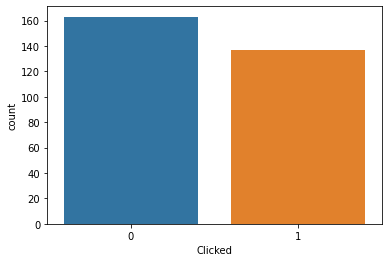

In [26]:
clicked_results = pd.read_csv(r'C:\Users\Admin\Downloads\clicked_results.csv')
sns.countplot(clicked_results['Clicked']);

## You will notice that in this Github repository that I have two results, clicked_results.csv and clicked_results2.csv, in the first one I didn't use Timestamp but in the second one I did. 